A big social platform recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding
type, called “maximum bidding”. One of our clients has decided to test this new feature
and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum
bidding.

In this A/B test, our clietn randomly splits its audience into two equally sized groups, e.g. the test
and the control group. An existing ad campaign with “maximum bidding” is served to “control group” and
new campaign with “average bidding” is served to the “test group”.
The A/B test has run for 1 month and our client now expects you to analyze and present the results
of this A/B test.

You should answer the following questions in your presentation:
1. How would you define the hypothesis of this A/B test?
2. Can we conclude statistically significant results?
3. Which statistical test did you use, and why?
4. Based on your answer to Question 2, what would be your recommendation to client?

## DATA UNDERSTANDING

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
control = pd.read_excel("Data_Science_Case_Study.xlsx", sheet_name="Control Group")
test = pd.read_excel("Data_Science_Case_Study.xlsx", sheet_name="Test Group")
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [4]:
control.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).round(2).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Spend [USD],30.0,2481.79,270.35,1723.72,2141.08,2321.53,2499.63,2648.65,2739.79,2811.64,3033.33,3105.84
# of Impressions,29.0,114608.83,18122.02,68766.00,94772.00,100769.00,118268.00,125097.00,135112.00,141411.60,146171.12,146702.00
Reach,29.0,87628.48,15958.83,49422.00,70760.60,75440.00,86442.00,97334.00,107183.00,110093.80,118620.12,121762.00
# of Website Clicks,29.0,5150.90,1432.39,2244.00,3520.00,4247.00,4975.00,6387.00,6728.60,7342.40,8000.96,8139.00
# of Searches,29.0,2016.76,621.06,931.00,1213.40,1657.00,1969.00,2282.00,2969.60,3071.20,3216.64,3262.00
# of View Content,29.0,1546.31,466.07,500.00,975.80,1220.00,1541.00,1898.00,2057.40,2153.20,2458.48,2559.00
# of Add to Cart,29.0,1061.86,429.35,303.00,554.40,715.00,1013.00,1455.00,1587.60,1640.40,1872.48,1959.00
# of Purchase,29.0,507.38,146.12,217.00,340.20,400.00,484.00,605.00,673.80,727.20,780.80,799.00


In [5]:
control.corr().round(2)

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
Spend [USD],1.00,-0.14,-0.00,0.00,0.05,-0.07,0.14,0.00
# of Impressions,-0.14,1.00,0.81,0.80,0.70,0.73,0.60,0.73
Reach,-0.00,0.81,1.00,0.67,0.63,0.59,0.57,0.61
# of Website Clicks,0.00,0.80,0.67,1.00,0.93,0.93,0.78,0.97
# of Searches,0.05,0.70,0.63,0.93,1.00,0.84,0.69,0.92
# of View Content,-0.07,0.73,0.59,0.93,0.84,1.00,0.77,0.89
# of Add to Cart,0.14,0.60,0.57,0.78,0.69,0.77,1.00,0.78
# of Purchase,0.00,0.73,0.61,0.97,0.92,0.89,0.78,1.00


In [6]:
#as we can see from above, Spend variable has no significant correlation between other variables.
#But, other variables have high correlation between each other and between the "# of Purchase" varible. To visualize:

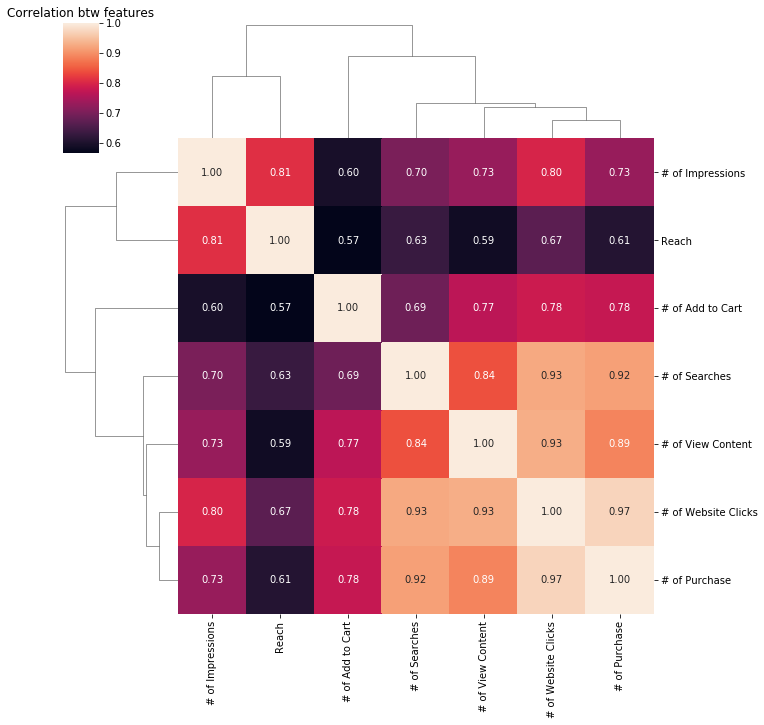

In [7]:
correlation_matrix = control.corr().round(2)
threshold=0.75
filtre=np.abs(correlation_matrix['# of Purchase'])>0.50
corr_features=correlation_matrix.columns[filtre].tolist()
sns.clustermap(control[corr_features].corr(),annot=True,fmt=".2f")
plt.title('Correlation btw features')
plt.show()

In [8]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492


In [9]:
test.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).round(2).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Spend [USD],30.0,2571.43,298.02,1974.36,2185.02,2344.07,2641.86,2807.27,2896.59,2972.23,3074.01,3091.27
# of Impressions,30.0,110497.30,21330.44,73246.00,81967.10,99564.25,108999.00,122314.25,138668.00,144149.70,156849.55,160244.00
Reach,30.0,88826.83,21373.02,53002.00,66001.80,71442.00,86525.50,104221.00,111679.80,129359.35,136830.75,137273.00
# of Website Clicks,30.0,4863.87,1178.62,3086.00,3507.60,3991.25,4910.00,5471.00,6417.10,6660.75,7778.43,8223.00
# of Searches,30.0,1862.43,482.16,1157.00,1354.80,1540.50,1822.00,2176.25,2479.00,2729.70,2915.63,2989.00
# of View Content,30.0,1457.60,484.11,817.00,963.80,1145.50,1321.50,1720.00,2074.20,2229.35,2766.01,2949.00
# of Add to Cart,30.0,885.33,270.61,226.00,562.40,687.50,880.50,1062.25,1210.70,1290.40,1356.50,1371.00
# of Purchase,30.0,486.07,125.65,277.00,362.90,410.00,472.00,549.00,613.20,657.35,848.91,913.00


In [10]:
test.corr().round(2)

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
Spend [USD],1.00,-0.47,-0.34,-0.37,-0.25,-0.18,-0.07,-0.31
# of Impressions,-0.47,1.00,0.86,0.89,0.73,0.67,0.41,0.86
Reach,-0.34,0.86,1.00,0.66,0.56,0.45,0.23,0.61
# of Website Clicks,-0.37,0.89,0.66,1.00,0.89,0.76,0.56,0.97
# of Searches,-0.25,0.73,0.56,0.89,1.00,0.68,0.61,0.83
# of View Content,-0.18,0.67,0.45,0.76,0.68,1.00,0.44,0.83
# of Add to Cart,-0.07,0.41,0.23,0.56,0.61,0.44,1.00,0.55
# of Purchase,-0.31,0.86,0.61,0.97,0.83,0.83,0.55,1.00


In [11]:
#as we can see from above, Spend variable has no significant correlation between other variables.
#But, other variables have high correlation between each other and between the "# of Purchase" varible. To visualize:

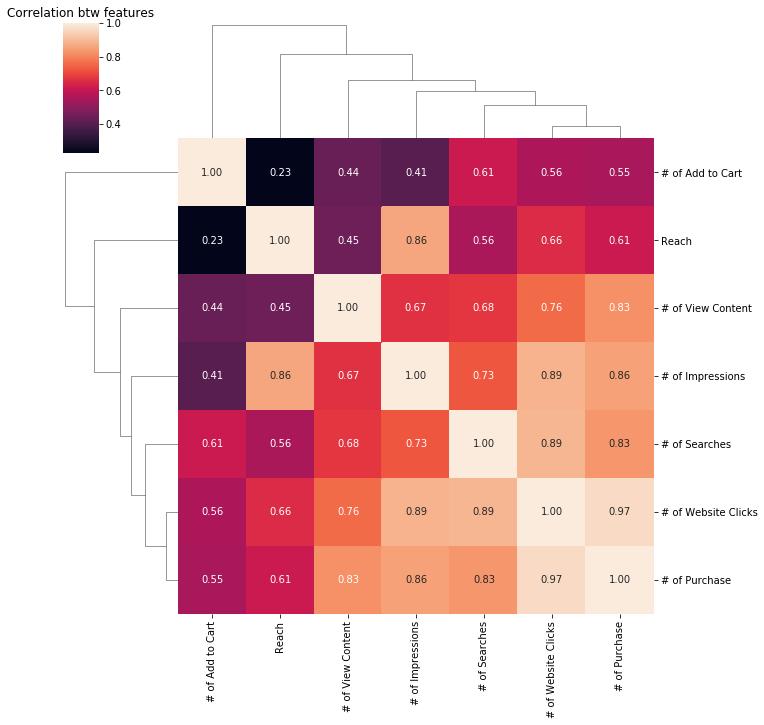

In [12]:
correlation_matrix = test.corr().round(2)
threshold=0.75
filtre=np.abs(correlation_matrix['# of Purchase'])>0.50
corr_features=correlation_matrix.columns[filtre].tolist()
sns.clustermap(test[corr_features].corr(),annot=True,fmt=".2f")
plt.title('Correlation btw features')
plt.show()

## DATA PREPROCESSING

In [13]:
test.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [14]:
#there is no nll value in test group

In [15]:
control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [16]:
#we can see that there is one missing value in #of Purchase and 6 other variable. 
##First, lets drop the object and date variables and then
#lets assign the mean of these variables to their own NA values 

In [17]:
control=control.drop("Campaign Name", axis=1)

In [18]:
control=control.drop("Date", axis=1)

In [19]:
control=control.apply(lambda x: x.fillna(x.mean()),axis=0)

In [20]:
control.isnull().sum()

Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [21]:
#as we can see, there is no null value anymore. 

In [22]:
control

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,2436.124529,90572.000000,75440.000000,4150.000000,1657.000000,1541.000000,566.000000,383.00000
1,2621.043006,129612.000000,95667.000000,6387.000000,2265.000000,1563.000000,1577.000000,644.00000
2,2427.021083,132803.000000,121762.000000,6887.000000,3100.000000,2048.000000,1381.000000,639.00000
3,2565.414978,120570.000000,104011.000000,6478.000000,2579.000000,2083.000000,1650.000000,649.00000
4,2648.683326,95822.000000,69059.000000,4532.000000,1823.000000,1220.000000,940.000000,455.00000
5,2306.081623,118268.000000,83562.000000,6596.000000,2955.000000,1815.000000,1455.000000,734.00000
6,2356.996404,144806.000000,105315.000000,8139.000000,3262.000000,2559.000000,1502.000000,799.00000
7,2670.222971,97719.000000,74746.000000,5508.000000,2282.000000,1840.000000,837.000000,605.00000
8,2720.901584,113781.000000,97334.000000,5901.000000,2109.000000,1955.000000,1959.000000,562.00000
9,2441.534142,125097.000000,90192.000000,7646.000000,2914.000000,2200.000000,1433.000000,717.00000


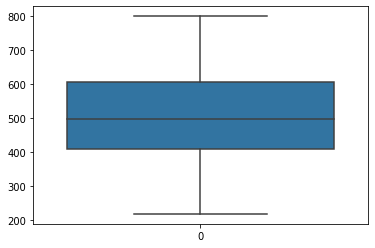

In [23]:
import seaborn as sns
sns.boxplot(data = control["# of Purchase"]);

In [24]:
#there is no outlier in control group

In [25]:
test["# of Purchase"].describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

count     30.000000
mean     486.066667
std      125.648643
min      277.000000
10%      362.900000
25%      410.000000
50%      472.000000
75%      549.000000
90%      613.200000
95%      657.350000
99%      848.910000
max      913.000000
Name: # of Purchase, dtype: float64

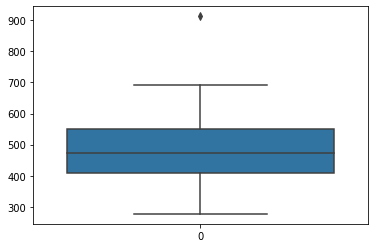

In [26]:
import seaborn as sns
sns.boxplot(data = test["# of Purchase"]);

In [27]:
#as can be seen from the Test group's boxplot, there is one outlier. We can repress this value by assigning the upper bound value to it:

In [28]:
Q1 = test["# of Purchase"].quantile(0.25)
Q3 = test["# of Purchase"].quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
upper

757.5

In [29]:
test[test["# of Purchase"] > upper]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913


In [30]:
test.loc[test["# of Purchase"] > upper, "# of Purchase"]=upper

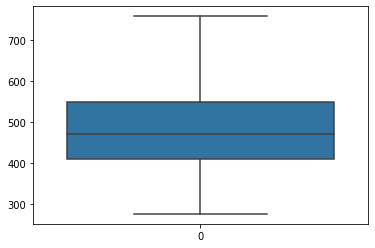

In [31]:
sns.boxplot(data = test["# of Purchase"]);

In [32]:
#now we have no outliers in test group as well. 

In [33]:
test["# of Purchase"].mean()

480.8833333333333

In [34]:
test["Spend [USD]"].mean()

2571.4260849137945

In [35]:
control["Spend [USD]"].mean()

2481.7880260658403

In [36]:
control.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [37]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,757.5
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510.0
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391.0
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434.0
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492.0


In [38]:
#Control Group has 507 purchases in average and test group has 481 purchases in average, meaning Control group has more purchases in average.
#However, we need to check if this is a significant difference. For this, we need to make hyphothesis test:

Control Group which is group A is the group where the “maximum bidding” campaign is applied and

Test Group which is group B is the group where the “average bidding” campaign is applied

Group A: Maximum Bidding - Control Group

Group B: Average Bidding - Test Group


In [39]:
#Now we can take #of purchae values as separate dfs of boths groups

In [40]:
C=control["# of Purchase"]
C.head()

0    383.0
1    644.0
2    639.0
3    649.0
4    455.0
Name: # of Purchase, dtype: float64

In [41]:
C= C.astype('int64') 

In [42]:
T=test["# of Purchase"]
T.head()

0    757.5
1    510.0
2    391.0
3    434.0
4    492.0
Name: # of Purchase, dtype: float64

In [43]:
T.mean()

480.8833333333333

In [44]:
AB = pd.concat([C, T], axis = 1)
AB.columns = ["A","B"]

AB.head()

,A,B
0,383,757.5
1,644,510.0
2,639,391.0
3,649,434.0
4,455,492.0


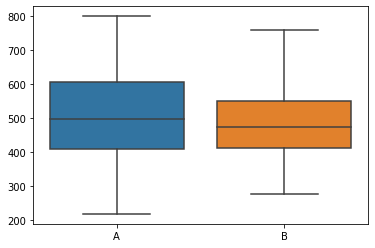

In [45]:
sns.boxplot(data = AB);

## Assumption Control

As we have independent and paired sample groups, we can use T-testing for Hypothesis test. A t-test a statistic method used to determine if there is a significant difference between the means of two groups based on a sample of data. The common assumptions made when doing a t-test include normality of data distribution and equality of variance in standard deviation.

1. Normality of data distribution
2. Equality of variances

### 1) Controlling 1st Assumption:
H0: The data is normally distributed

H1: The data is not normally distributed

In [46]:
from scipy.stats import shapiro

In [47]:
shapiro(AB.A)

(0.9882097244262695, 0.9787935018539429)

In [48]:
shapiro(AB.B)

(0.9781895279884338, 0.7756415009498596)

If p<0.05, reject H0

p value of group A is 0.979 which is >0.05 so we fail to reject H0 meaning that group A is normally distributed

p value of group B is 0.776 which is >0.05 so we fail to reject H0 meaning that group B data is normally distributed.

### 2) Controlling 2nd Assumption:
H0: The variances are equal(homogenous)

H1: The variances are unequal(non-homogenous)

In [49]:
import scipy.stats as stats
stats.levene(AB.A, AB.B)

LeveneResult(statistic=2.6201793633591217, pvalue=0.1109382471960381)

As the p-value is 0.11 which is >0.05, we do not reject H0 meaning that the variances of both groups are equal

# Hyphotesis Testing (A-B Test)

As the normality and equal variance of distributions assumptions are satisfied, we will use Independent Two-Sample T-Test for testing the hyphothesis.

H0: There is not statistically significant difference between two groups' purchase numbers

H1: There is significant difference between two groups' purchase numbers

In [50]:
stats.ttest_ind(AB["A"], AB["B"])

Ttest_indResult(statistic=0.8030353231176146, pvalue=0.42523295401589134)

p-value is 0.42 which is >0.05 meaning that we fail to reject H0. This means there is not statistically significant differentce between two groups purchase numbers. Both campaigns can be used. 

Group A: Maximum Bidding - Control Group - mean= 507

Group B: Average Bidding - Test Group  - mean= 486

to try to suggest something to the client, we can investigate other important metrics which are:
Website Click Through Rate: Number of Website Clicks / Number of Impressions x 100
Cost per Action: Spend / Number of Actions
Conversion Rate: Number of Actions / Number of Website Clicks x 100


## OTHER METRICS

## PROPORTION TESTS ARE APPLIED FOR THE RATE METRICS

In [51]:
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

### 1) CTR

Null hypothesis: There is no statistically significant difference between control and test group CTR rates., in short p1 = p2

Alternative hypothesis: There is a statistically significant difference between control and test group CTR rates.


In [52]:
clicks= np.array([control["# of Website Clicks"].sum(),test["# of Website Clicks"].sum()])
impressions= np.array([control["# of Impressions"].sum(),test["# of Impressions"].sum()])

proportions_ztest(count=clicks, nobs=impressions,  alternative='two-sided')

(5.830354822176507, 5.53096408153157e-09)

Sonuç: pval< 0.05--> Reject H0
When bidding methods are examined, there is a statistically significant difference between CTR rates. And this difference is in favor of the current "max bidding" method.

In [53]:
control_CTR=control["# of Website Clicks"].mean()/control["# of Impressions"].mean()
test_CTR= test["# of Website Clicks"].mean() / test["# of Impressions"].mean()
print(control_CTR)

print(test_CTR)

0.044943279328546644
0.04401796846318115


### 2) CPA

Lets calcute this rate as follows:
    
Number of purchase/Spend: meaning that how many purchases gained for 1 USD of expenditure:
        

In [73]:
control_CPA=(control["# of Purchase"]/control["Spend [USD]"])
control_CPA.head()

0    0.157217
1    0.245704
2    0.263286
3    0.252981
4    0.171783
dtype: float64

In [74]:
control_CPA.mean()

0.207090438246648

In [56]:
# so for example, for 100 USD of spend, there were made 21 purchases in avg in the control group

In [75]:
test_CPA=(test["# of Purchase"]/test["Spend [USD]"])
test_CPA.head()

0    0.324330
1    0.175893
2    0.128969
3    0.155286
4    0.223449
dtype: float64

In [76]:
test_CPA.mean()

0.1911742462159723

In [78]:
1/test_CPA.mean()

5.2308300924083975

In [59]:
# so for example, for 100 USD of spend, there were made 19 purchases in avg in the test group

In [60]:
spend= np.array([control["Spend [USD]"].sum(), test["Spend [USD]"].sum()])
purchase= np.array([control["# of Purchase"].sum(), test["# of Purchase"].sum()])

proportions_ztest(count=purchase, nobs=spend)


(8.553896718651608, 1.1900139318307916e-17)

result: pval< 0.05--> Reject H0 meaning that there is statistically meaningful difference between two groups CPA values.
We can say that the existing method: max bidding is better than the new one.


### 3) CR

#### 3a) CR: # of Purchases: / Number of Website Clicks


In [80]:
control_CR=(control["# of Purchase"]/control["# of Website Clicks"])
control_CR.mean()

0.09832048553902865

In [82]:
test_CR=(test["# of Purchase"]/test["# of Website Clicks"])
test_CR.mean()

0.0992718554193331

The hypothesis is constructed as follows:

H0: There is no statistically significant difference between control and test group CR rates.

H1: There is a statistically significant difference between control and test group CR rates.


In [61]:
proportions_ztest(count=purchase, nobs=clicks)

(-0.3356685344006994, 0.7371208363318503)

Fail to Reject H0 meaning that there is not statistically meaningful difference between two groups CPA values.
We cannot conclude anything in here.

#### 3b) CR: # of Purchases: / Number of Add to Cart

In [62]:
control_CR2=(control["# of Purchase"]/control["# of Add to Cart"])
control_CR2.head()

0    0.676678
1    0.408370
2    0.462708
3    0.393333
4    0.484043
dtype: float64

In [63]:
control_CR2.mean()

0.512479667047576

In [64]:
test_CR2=(test["# of Purchase"]/test["# of Add to Cart"])
test_CR2.head()

0    0.552516
1    0.407023
2    0.392965
3    0.456362
4    0.607407
dtype: float64

In [65]:
test_CR2.mean()

0.588525234225095

In [66]:
#this result shows that the occurance number of buying items after they are added into cart is more in test group.

In [67]:
atc= np.array([control["# of Add to Cart"].sum(),test["# of Add to Cart"].sum()])
proportions_ztest(count=purchase, nobs=atc)

(-15.73048104685388, 9.34980380493796e-56)

result: pval< 0.05--> Reject H0 meaning that there is statistically meaningful difference between two groups CPA values.

We can say that as the test group has more avg. rate, the new method: average bidding is better than the current method.
It is the only result which favoured the new method.

#### 3c) CR: # of Purchases: / Number of View Content

In [85]:
control_CR3=(control["# of Purchase"]/control["# of View Content"])
control_CR3.mean()

0.33391819797840416

In [86]:
test_CR3=(test["# of Purchase"]/test["# of View Content"])
test_CR3.mean()

0.34462429185103854

In [87]:
views= np.array([control["# of View Content"].sum(),test["# of View Content"].sum()])
proportions_ztest(count=purchase, nobs=views)

(-0.5721954416069182, 0.5671895753480987)

Fail to Reject H0 meaning that there is not statistically meaningful difference between two groups.
We cannot conclude anything in here.

If there is a chance on account of time, budget etc, I recommend to client to collect more data before drawing any conclusions. 
If there is no chance, it is not suggested to be used new bidding type (average bidding). Because average spend value of new method is more that the existing one. No need to spend more while there is no significant difference between two models. while running new type bidding, 
Also, mean value of purchase of the existing method is more than the new one.

As a result, it doesn’t bring more conversions than existing bidding type (max bidding). I recommend to the client to continue with existing bidding type.

In [90]:
cs=control["Spend [USD]"].mean()
cs

2481.7880260658403

In [91]:
ts=test["Spend [USD]"].mean()
ts

2571.4260849137945

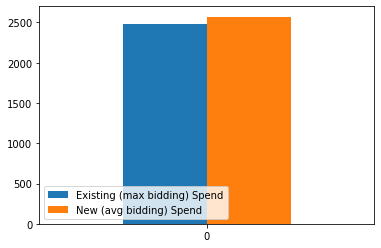

In [104]:
spend=pd.DataFrame({"Existing (max bidding) Spend":[cs], "New (avg bidding) Spend": [ts]})
spend.plot.bar(rot=0).legend(loc=3) ;

In [97]:
cp=control["# of Purchase"].mean()
cp

507.3793103448276

In [100]:
tp=test["# of Purchase"].mean()
tp

480.8833333333333

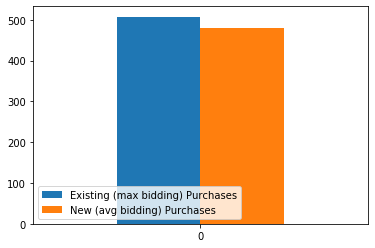

In [105]:
purchase=pd.DataFrame({"Existing (max bidding) Purchases":[cp], "New (avg bidding) Purchases": [tp]})
purchase.plot.bar(rot=0).legend(loc=3) ;

In [101]:
cc=control["# of Website Clicks"].mean()
cc

5150.896551724139

In [102]:
tc=test["# of Website Clicks"].mean()
tc

4863.866666666667

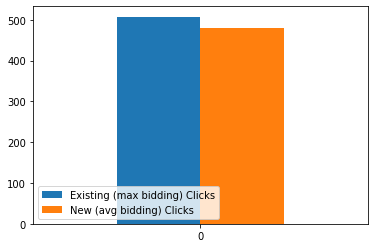

In [106]:
clicks=pd.DataFrame({"Existing (max bidding) Clicks":[cp], "New (avg bidding) Clicks": [tp]})
clicks.plot.bar(rot=0).legend(loc=3) ;

# REPORT
- Control and test group data were analyzed (with info, describe methods).
- One row containing NA values ​​was found in the control group.
- It was observed that the variables were distributed normally, so NA values ​​were filled with the mean of the respective variable.
- In the test group, it was observed in 1 outlier box plot. (Outlier was suppressed with the suppression method.)
- AB test was performed by comparing the control group using the max bidding method and the test group using avg bidding method to the new method.
- Independent 2 sample t test was deemed appropriate for this comparison. Variations were provided.
- Pvalue was found 0.425 at the end of the test. The hypothesis that the means of purchasing products from the control group and the test group are equal to each other could not be rejected because it is greater than 0.05.

# Other Metrics

### CTR:
pval <0.05 -> Reject H0.
- When the bidding methods are examined, the effect of these methods on user behavior (clicks) is different. And this difference is in favor of the current "max bidding" method.


### Conversion Rate:
- pval> 0.05 -> Fail to reject H0
- When the bidding methods are examined, there is no difference between the effects of these methods on user behavior (purchasing).

### CPA
- pval <0.05 -> Reject H0
When the bidding methods are examined, the effect of these methods on the cost is different. This difference is in favor of the current "max bidding" method.

# Recommendation to Client

- When the new system is compared with the old system, it is seen that the number of purchases decreases, the cost increases and the clicks decrease.
- When the Conversion Rate is based on the purchasing status among those who add it to the basket and those who look at the product details, a comparison is made in favor of the test group.

For this reason, it is recommended to collect more data and retest. If there is no such opportunity or time, it is recommended to continue with the existing bidding system.